# **🍽️ Restaurant Tips Analysis**

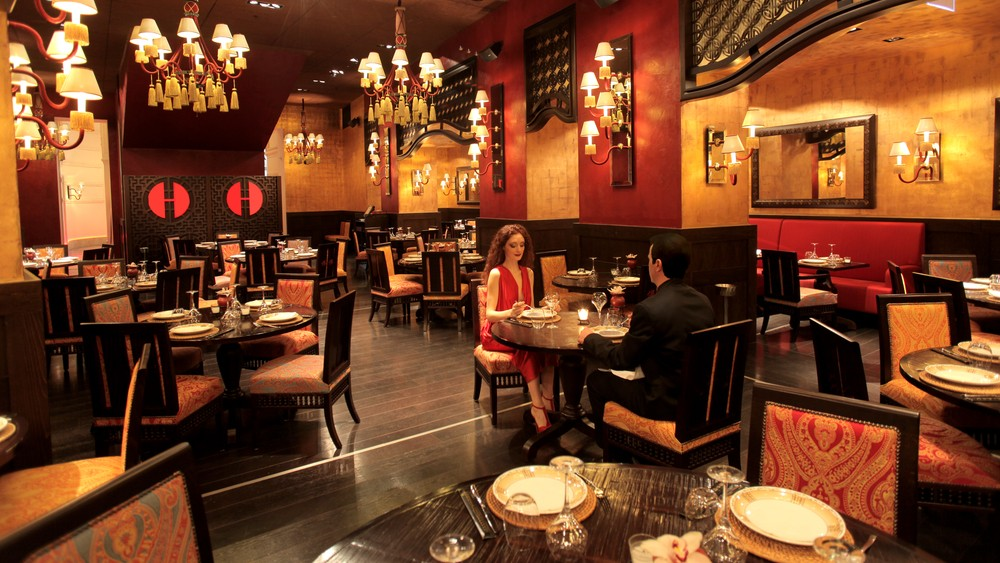

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills,
collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas, Matplotlib & mannwhitneyu.

In [1]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

Then load data from the following link: https://raw.githubusercontent.com/letuanGithubVn1/Restaurant-Tips-Analysis/refs/heads/main/tips.csv

In [2]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/letuanGithubVn1/Restaurant-Tips-Analysis/refs/heads/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [ ]:
# PUT YOUR CODE HERE
df.head(5)

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

**Show** the columns of the dataframe and their types:

In [3]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-

> **Ooops... 🤔**
>
> We have string columns considered as objects.

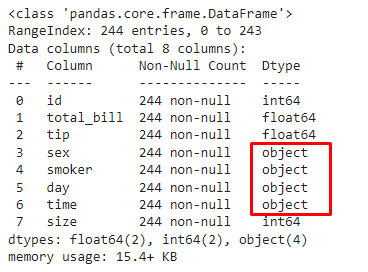

Let's fix their types and make them string:

In [ ]:
# PUT YOUR CODE HERE
df = df.convert_dtypes()

Check again (output columns and their types):

In [ ]:
# PUT YOUR CODE HERE
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Index(['id', 'total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

*Show* a descriptive statistics of the numeric columns:

In [ ]:
# PUT YOUR CODE HERE
df.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **do_people_who_smoke_give_more_tips**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [ ]:
# PUT YOUR CODE HERE
# smokers_df  = df[df['smoker'] == 'Yes']
smokers_df = df.query("smoker == 'Yes'")
smokers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93 entries, 56 to 241
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          93 non-null     Int64  
 1   total_bill  93 non-null     Float64
 2   tip         93 non-null     Float64
 3   sex         93 non-null     string 
 4   smoker      93 non-null     string 
 5   day         93 non-null     string 
 6   time        93 non-null     string 
 7   size        93 non-null     Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 6.9 KB


Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
230,230,24.01,2.0,Male,Yes,Sat,Dinner,4
188,188,18.15,3.5,Female,Yes,Sun,Dinner,3
168,168,10.59,1.61,Female,Yes,Sat,Dinner,2
100,100,11.35,2.5,Female,Yes,Fri,Dinner,2
169,169,10.63,2.0,Female,Yes,Sat,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df = df[df['smoker'] == 'No']

Check whether everything is okay. Output a test sample (5 random rows):

In [ ]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
82,82,10.07,1.83,Female,No,Thur,Lunch,1
37,37,16.93,3.07,Female,No,Sat,Dinner,3
38,38,18.69,2.31,Male,No,Sat,Dinner,3
165,165,24.52,3.48,Male,No,Sun,Dinner,3
9,9,14.78,3.23,Male,No,Sun,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [ ]:
# YOUR CODE
common_tip_min = df['tip'].min()
common_tip_max = df['tip'].max()
common_tip_mean = df['tip'].mean()
common_tip_median = df['tip'].median()

Let's show the resulting values for whole dataset

In [ ]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# map(function, interable) không tạo danh sách ngay lập tức – nó trả về một "lazy iterator" (chưa thực hiện cho đến khi bạn duyệt qua nó)
# bộ nhớ sẽ không lưu đối tượng lazy iterator, trừ khi chuyển sang đối tượng khác như list, tuple, Dict...
# Tham khảo tại: "https://howkteam.vn/course/lap-trinh-python-co-ban/iteration-va-mot-so-ham-ho-tro-cho-iteration-object-trong-python-1571"
print(common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [ ]:
# YOUR CODE
smokers_tip_min = smokers_df['tip'].min()
smokers_tip_max = smokers_df['tip'].max()
smokers_tip_mean = smokers_df['tip'].mean()
smokers_tip_median = smokers_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smoker_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smoker_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [ ]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df['tip'].min()
non_smokers_tip_max = non_smokers_df['tip'].max()
non_smokers_tip_mean = non_smokers_df['tip'].mean()
non_smokers_tip_median = non_smokers_df['tip'].median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_mean]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smoker_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smoker_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.9919


##### **📝 Conclusion**

Let's show the retrieved results together:

In [ ]:
# Dict(Dictionary)
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe From Dict
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Mean:
Smokers have a slightly higher average tip amount (3.0087) compared to non-smokers (2.9919).
2. Median:
The median tip for smokers is 3.00, which is also higher than that of non-smokers (2.74).

**General conclusion:**
Based on both the mean and median, smokers tend to give slightly higher tips than non-smokers

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

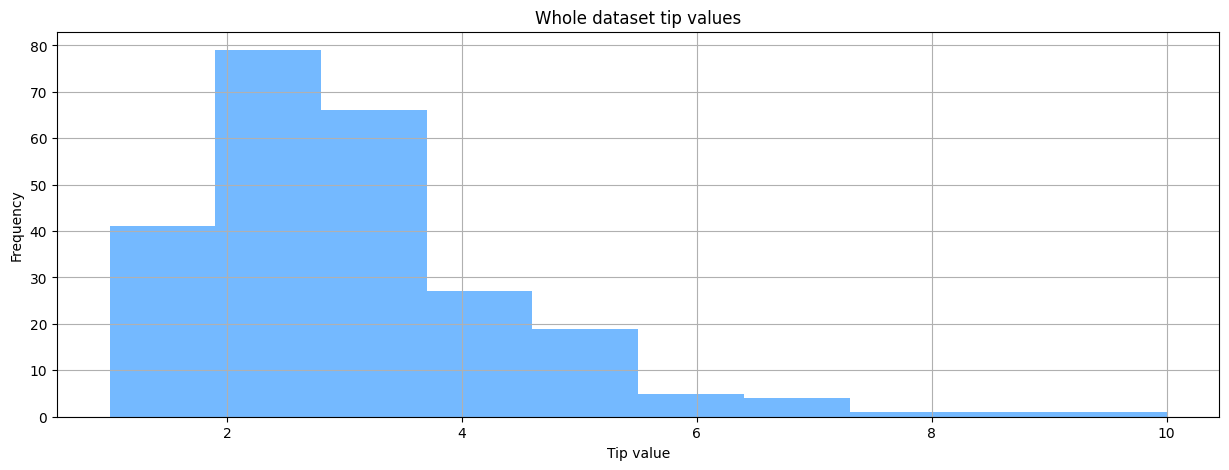

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df['tip'], color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

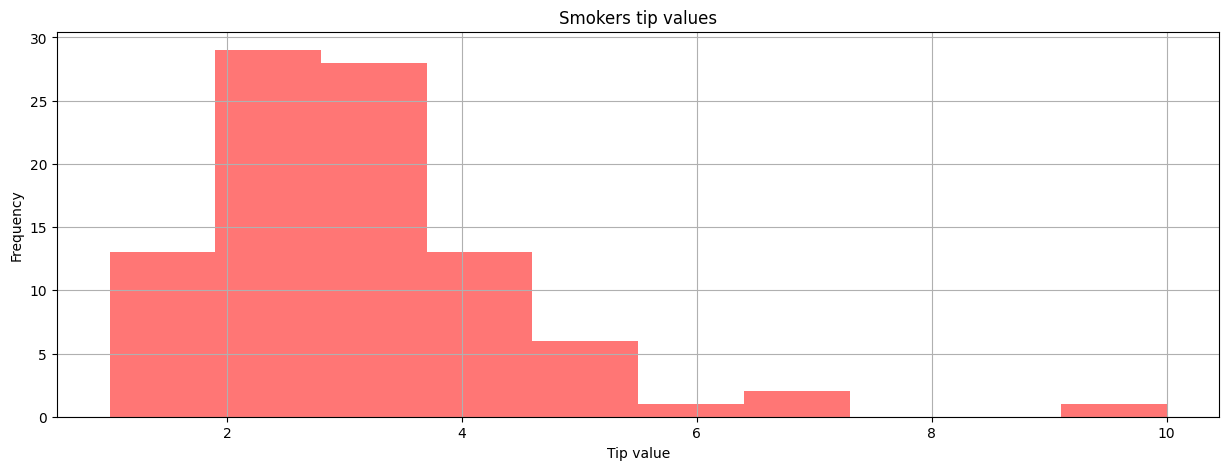

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(smokers_df['tip'], color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')
plt.grid(True)

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

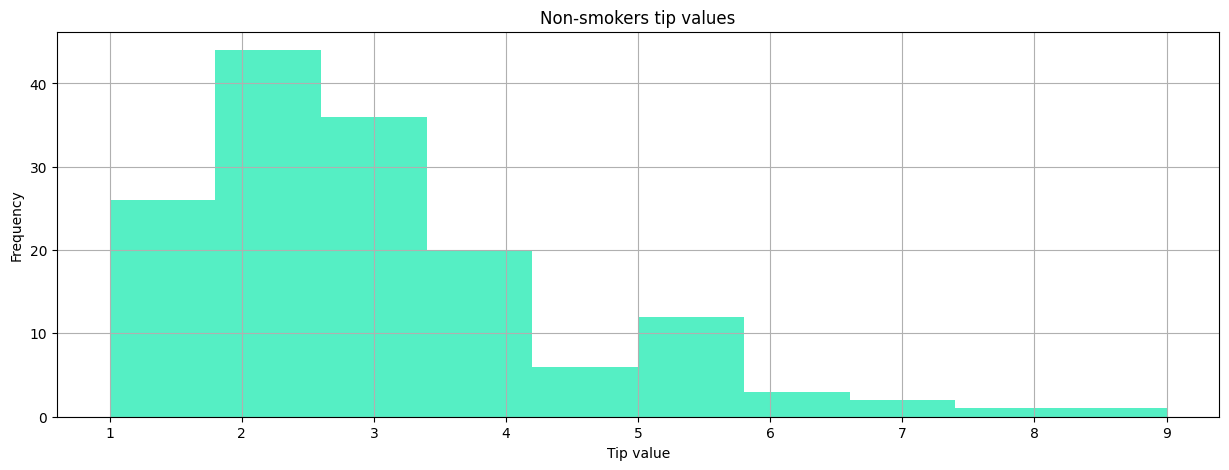

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(non_smokers_df['tip'], color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')
plt.grid(True)

#### **⭐ All 3 charts in a row in the same cell:**

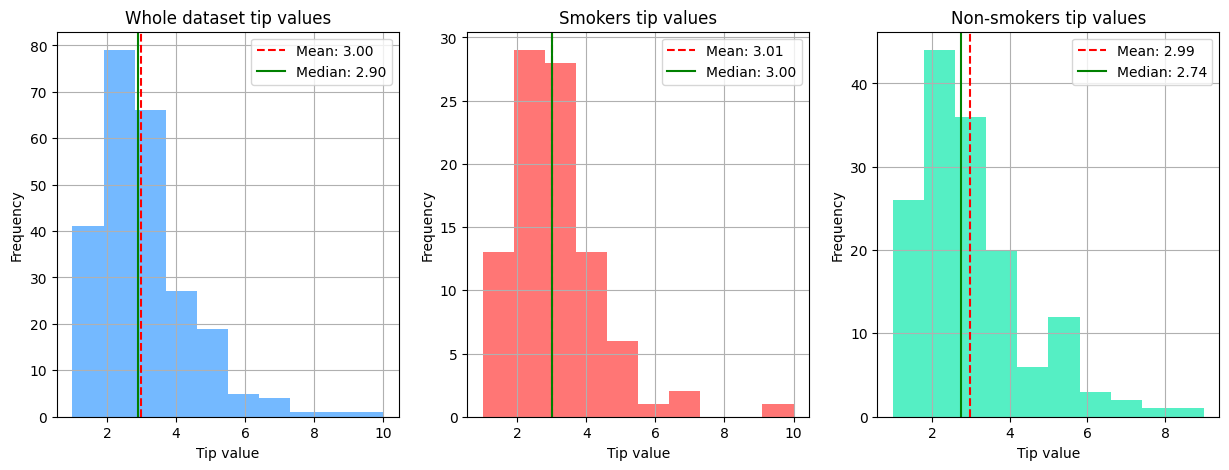

In [ ]:
# YOUR CODE
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['tip'], color='#74b9ff')
axes[0].axvline(df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {df["tip"].mean():.2f}')
axes[0].axvline(df['tip'].median(), color='green', linestyle='-', label=f'Median: {df["tip"].median():.2f}')
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

axes[1].hist(smokers_df['tip'], color='#ff7675')
axes[1].axvline(smokers_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {smokers_df["tip"].mean():.2f}')
axes[1].axvline(smokers_df['tip'].median(), color='green', linestyle='-', label=f'Median: {smokers_df["tip"].median():.2f}')
axes[1].set_title('Smokers tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

axes[2].hist(non_smokers_df['tip'], color='#55efc4')
axes[2].axvline(non_smokers_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {non_smokers_df["tip"].mean():.2f}')
axes[2].axvline(non_smokers_df['tip'].median(), color='green', linestyle='-', label=f'Median: {non_smokers_df["tip"].median():.2f}')
axes[2].set_title('Non-smokers tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True)



##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

The histogram shows that the tip distribution for smokers leans toward higher values, whereas non-smokers tend to tip lower amounts.

**General conclusion:** Smokers tend to give slightly more tips than non-smokers, but the difference is minimal.  
With the current dataset, ***this difference may not be statistically significant*** unless supported by further tests

##### 📊 **Mann–Whitney U test**

In [ ]:
smoker_tips = df[df['smoker'] == 'Yes']['tip']
non_smoker_tips = df[df['smoker'] == 'No']['tip']

# Kiểm thử 1 phía H0: X <= Y, H1: X > Y
u_stat, p_value = mannwhitneyu(smoker_tips, non_smoker_tips, alternative='greater')

print(f"U-statistic: {u_stat}")
print(f"One-sided p-value: {p_value}")

# Kiểm thử 2 phía H0: phân phối 2 nhóm như nhau H1: phân phối 2 nhóm khác nhau
u_stat, p_value_u = mannwhitneyu(smoker_tips, non_smoker_tips, alternative='two-sided')
print(f"Mann-Whitney U test: p-value = {p_value_u}")


U-statistic: 7163.0
One-sided p-value: 0.3959620099191161
Mann-Whitney U test: p-value = 0.7919240198382322


###### **Conclusion after testing:**
Both the one-sided p-value (≈ 0.396) and the two-sided p-value (≈ 0.792) are greater than common significance levels (α = 0.05)  
There is **no statistically significant difference** in tips between smokers and non-smokers in this dataset.


### **👨👩 Do males give more tips?**

Let's figure out the difference between males and females in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate males and females**

Create a new dataframe `males_df` containing only info about males.

In [ ]:
# PUT YOUR CODE HERE
males_df = df.query("sex == 'Male'")

Also create another one dataframe `females_df` containing only females.

In [ ]:
# PUT YOUR CODE HERE
females_df = df[df['sex'] == 'Female']

#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **👨 Males**

Do the same taking into account only males. Use the following variables:

* min => `males_tip_min`
* max => `males_tip_max`
* mean => `males_tip_mean`
* median => `males_tip_median`

In [ ]:
# YOUR CODE
males_tip_min = males_df['tip'].min()
males_tip_max = males_df['tip'].max()
males_tip_mean = males_df['tip'].mean()
males_tip_median = males_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for males as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
males_values = [males_tip_min, males_tip_max, males_tip_mean, males_tip_median]
# Round all the values to 4 decimal places
males_values = map(lambda x: round(x, 4), males_values)

# Make a dataframe from the list
males_mct = pd.DataFrame(males_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
males_mct


,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


##### **👩 Females**

Now repeat it for females. Use the following variables:

* min => `females_tip_min`
* max => `females_tip_max`
* mean => `females_tip_mean`
* median => `females_tip_median`

In [ ]:
# YOUR CODE
females_tip_min = females_df['tip'].min()
females_tip_max = females_df['tip'].max()
females_tip_mean = females_df['tip'].mean()
females_tip_median = females_df['tip'].median()

Make the same dataframe containing the measures of central tendency for females as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
females_values = [females_tip_min, females_tip_max, females_tip_mean, females_tip_median]
# Round all the values to 4 decimal places
females_values = map(lambda x: round(x, 4), females_values)

# Make a dataframe from the list
females_mct = pd.DataFrame(females_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
females_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


##### **📝 Conclusion**

Let's show the retrieved results together

In [ ]:
# Dict(Dictionary)
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Males': {'min': males_tip_min, 'max': males_tip_max, 'mean': males_tip_mean, 'median': males_tip_median},
    'Females': {'min': females_tip_min, 'max': females_tip_max, 'mean': females_tip_mean, 'median': females_tip_median}
}

# Make a dataframe From Dict
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Males,Females
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


**Insights based on measures of central tendency comparison:**

***Insight 1 :***  
On average, males tend to give higher tips than females. **3.0896** compared to **2.8334**  

***Insight 2 :***   
The maximum tip given by males is significantly higher than that of females
Max:
*   Males: 10.0000
*   Females: 6.5000

Males are capable of giving much higher tips than females. This suggests that the highest tipping amounts mostly come from males.  

***Insight 3 :***  
Not only is the average higher, but the **median** is also greater for males. **3** compared to **2.75**. This minimizes the impact of outliers and confirms that most males tend to give higher tips than females.  

**General conclusion:**  
Based on the mean, max, and median values, we have statistical evidence to conclude that males (including those who smoke) tend to give higher tips than females. However, to specifically confirm that males who smoke give more tips, additional data segmented by smoking status is needed.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

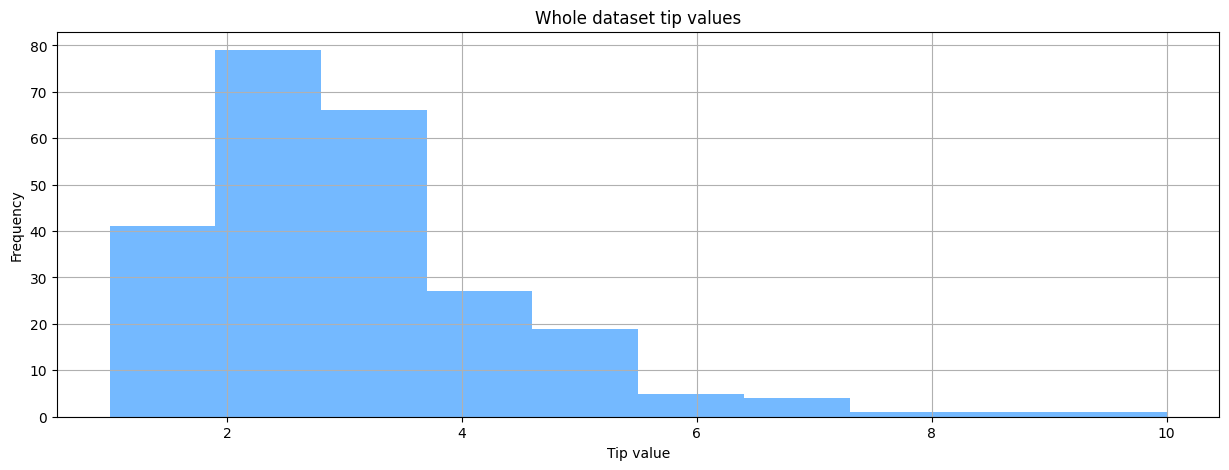

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(df['tip'], color='#74b9ff')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')
plt.grid(True)

##### **👨 Males tips histogram**

Plot the histogram for males tips distribution.

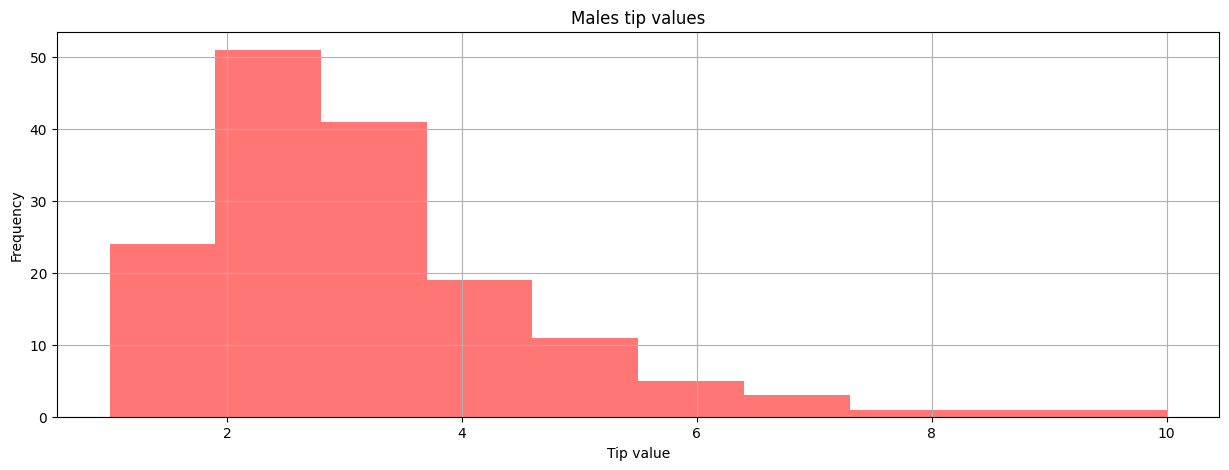

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(males_df['tip'], color='#ff7675')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Males tip values')
plt.grid(True)

##### **👩 Females tips histogram**

Plot the histogram for females tips distribution.

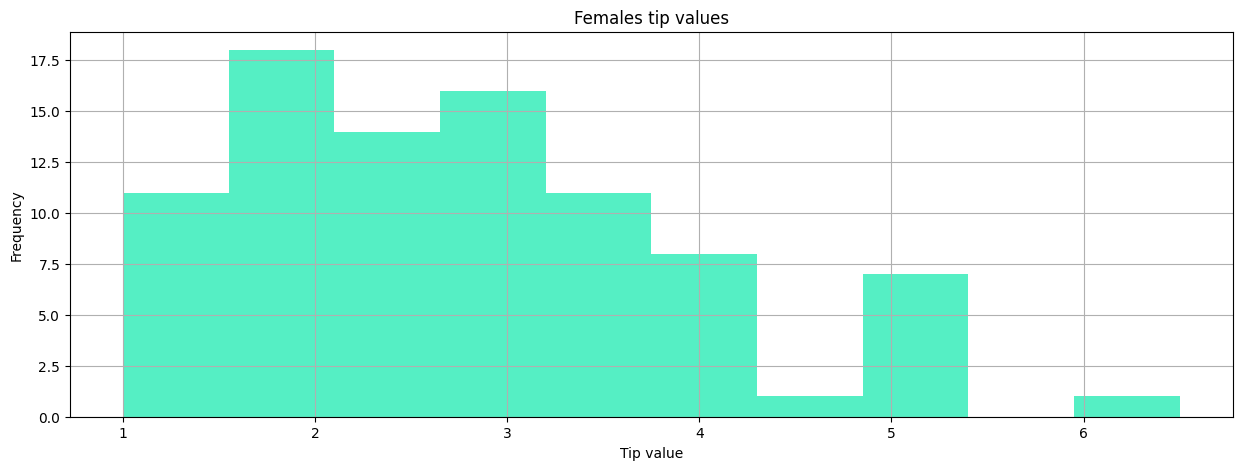

In [ ]:
# YOUR CODE
plt.figure(figsize=(15, 5))
plt.hist(females_df['tip'], color='#55efc4')
plt.xlabel('Tip value')
plt.ylabel('Frequency')
plt.title('Females tip values')
plt.grid(True)

##### **⭐ All 3 charts in a row in the same cell:**

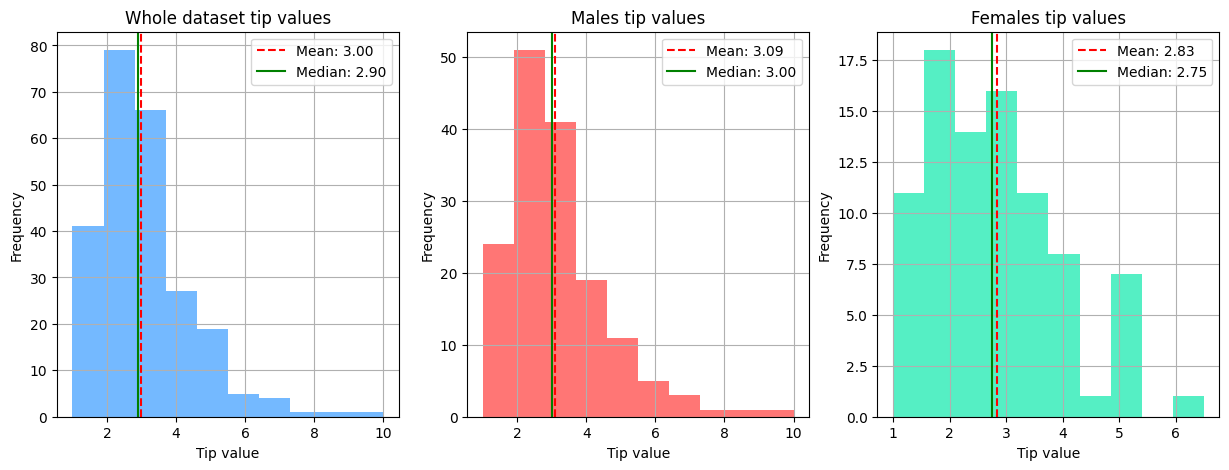

In [ ]:
# YOUR CODE
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['tip'], color='#74b9ff')
axes[0].axvline(df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {df["tip"].mean():.2f}')
axes[0].axvline(df['tip'].median(), color='green', linestyle='-', label=f'Median: {df["tip"].median():.2f}')
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

axes[1].hist(males_df['tip'], color='#ff7675')
axes[1].axvline(males_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {males_df["tip"].mean():.2f}')
axes[1].axvline(males_df['tip'].median(), color='green', linestyle='-', label=f'Median: {males_df["tip"].median():.2f}')
axes[1].set_title('Males tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

axes[2].hist(females_df['tip'], color='#55efc4')
axes[2].axvline(females_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {females_df["tip"].mean():.2f}')
axes[2].axvline(females_df['tip'].median(), color='green', linestyle='-', label=f'Median: {females_df["tip"].median():.2f}')
axes[2].set_title('Females tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True)



##### **📝 Conclusion**

**Insights based on distribution comparison:**

**General conclusion:** There is sufficient visual evidence from the charts to conclude that men tend to give more tips than women, in terms of mean, median, and the overall distribution of tip values. However, this is only descriptive. To be certain, statistical testing is needed to draw inferential conclusions about the entire customer population, not just the observed sample.

##### 📊 **Mann–Whitney U test**

In [ ]:
from scipy.stats import mannwhitneyu

males_tips = males_df['tip']
females_tips = df[df['sex'] == 'Female']['tip']

# Kiểm thử 1 phía H0: X <= Y, H1: X > Y
u_stat, p_value = mannwhitneyu(males_tips, females_tips, alternative='greater')

print(f"U-statistic: {u_stat}")
print(f"One-sided p-value: {p_value}")

# Kiểm thử 2 phía H0: phân phối 2 nhóm như nhau H1: phân phối 2 nhóm khác nhau
u_stat, p_value_u = mannwhitneyu(males_tips, females_tips, alternative='two-sided')
print(f"Mann-Whitney U test: p-value = {p_value_u}")


U-statistic: 7289.5
One-sided p-value: 0.19167724679681963
Mann-Whitney U test: p-value = 0.38335449359363927


###### **Conclusion after testing:**
Both the one-sided p-value (≈ 0.19167) and the two-sided p-value (≈ 0.38335) are greater than common significance levels (α = 0.05)  
There is **no statistically significant difference** in tips between males and females in this dataset. Even though the descriptive statistics (mean, median, etc.) suggest that men tend to tip more than women  
***More data is needed for a more accurate determination.***

### **👨 🚬  Do man who smoke give more tips?**

Let's figure out the difference between man-smokers and non-man-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate man-smokers and man-non-smokers**

In [ ]:
male_smokers_df = males_df[males_df['smoker'] == 'Yes']
# male_smokers_df = df[(df['sex'] == 'Male') & (df['smoker'] == 'Yes')]
male_smokers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 56 to 241
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          60 non-null     Int64  
 1   total_bill  60 non-null     Float64
 2   tip         60 non-null     Float64
 3   sex         60 non-null     string 
 4   smoker      60 non-null     string 
 5   day         60 non-null     string 
 6   time        60 non-null     string 
 7   size        60 non-null     Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 4.5 KB


In [ ]:
male_non_smokers_df = df[(df['smoker'] == 'No') & (df['sex'] == 'Male')]
# male_non_smokers_df = df.query("sex = 'Male' and smoker == 'No'")
male_non_smokers_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 1 to 242
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          97 non-null     Int64  
 1   total_bill  97 non-null     Float64
 2   tip         97 non-null     Float64
 3   sex         97 non-null     string 
 4   smoker      97 non-null     string 
 5   day         97 non-null     string 
 6   time        97 non-null     string 
 7   size        97 non-null     Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 7.2 KB


#### **Compare their measures of central tendency**

Comparing different datasets as it shows the most typical values.

##### **👨 🚬 man-smokers dataset**

Calculate them for the **'tip'** column through the man_smokers_df dataset and save them into the following variables:

* min => `male_smokers_tip_min`
* max => `male_smokers_tip_max`
* mean => `male_smokers_tip_mean`
* median => `male_smokers_tip_median`

In [ ]:
male_smokers_tip_min = male_smokers_df['tip'].min()
male_smokers_tip_max = male_smokers_df['tip'].max()
male_smokers_tip_mean = male_smokers_df['tip'].mean()
male_smokers_tip_median = male_smokers_df['tip'].median()

Let's show the resulting values for male_smokers_df dataset

In [ ]:
male_smokers_values = [male_smokers_tip_min, male_smokers_tip_max, male_smokers_tip_mean, male_smokers_tip_median]
# Round all the values to 4 decimal places
male_smokers_values = map(lambda x: round(x, 4), male_smokers_values)

# Make a dataframe from the list
man_smokers_mct = pd.DataFrame(male_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
man_smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0512
median,3.0000


##### **👨 🚭 man-non-smokers dataset**

Do the same taking into account only man-non-smokers. Use the following variables:

* min => `male_non_smokers_tip_min`
* max => `male_non_smokers_tip_max`
* mean => `male_non_smokers_tip_mean`
* median => `male_non_smokers_tip_median`

In [ ]:
male_non_smokers_tip_min = male_non_smokers_df['tip'].min()
male_non_smokers_tip_max = male_non_smokers_df['tip'].max()
male_non_smokers_tip_mean = male_non_smokers_df['tip'].mean()
male_non_smokers_tip_median = male_non_smokers_df['tip'].median()

Let's show the resulting values for male_smokers_df dataset

In [ ]:
male_non_smokers_values = [male_non_smokers_tip_min, male_non_smokers_tip_max, male_non_smokers_tip_mean, male_non_smokers_tip_median]
# Round all the values to 4 decimal places
male_non_smokers_values = map(lambda x: round(x, 4), male_non_smokers_values)
# Make a dataframe from the list
male_non_smokers_mct = pd.DataFrame(male_non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
male_non_smokers_mct

,0
min,1.2500
max,9.0000
mean,3.1134
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together

In [ ]:
all_vals_dict = {
    'Males': {'min': males_tip_min, 'max': males_tip_max, 'mean': males_tip_mean, 'median': males_tip_median},
    'Males_Smokers': {'min': male_smokers_tip_min, 'max': male_smokers_tip_max, 'mean': male_smokers_tip_mean, 'median': male_smokers_tip_median},
    'Males_Non_Smokers': {'min': male_non_smokers_tip_min, 'max': male_non_smokers_tip_max, 'mean': male_non_smokers_tip_mean, 'median': male_non_smokers_tip_median}
}

# Make a dataframe From Dict
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Males,Males_Smokers,Males_Non_Smokers
min,1.000000,1.000000,1.250000
max,10.000000,10.000000,9.000000
mean,3.089618,3.051167,3.113402
median,3.000000,3.000000,2.740000


#### **Look at histograms**

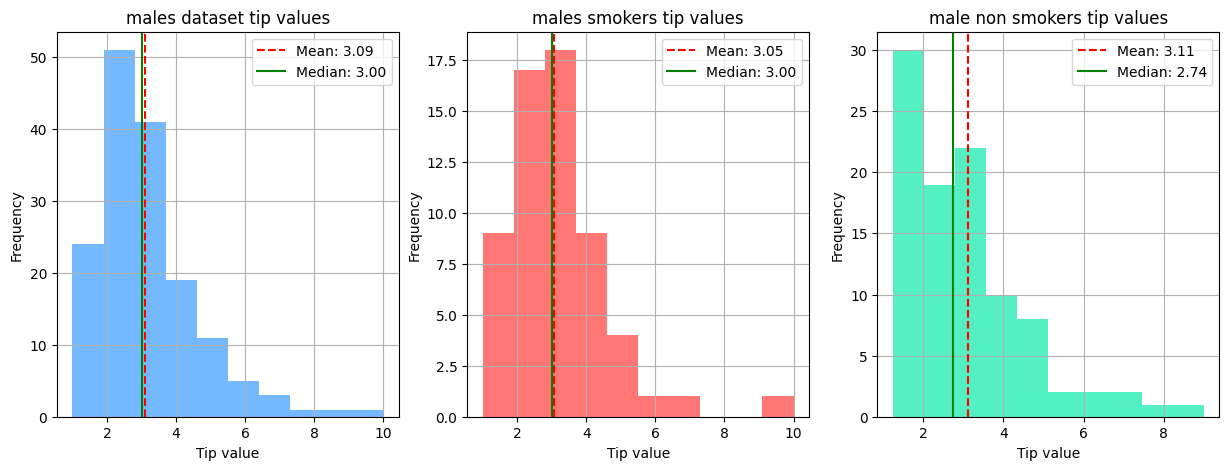

In [ ]:
# YOUR CODE
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(males_df['tip'], color='#74b9ff')
axes[0].axvline(males_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {males_df["tip"].mean():.2f}')
axes[0].axvline(males_df['tip'].median(), color='green', linestyle='-', label=f'Median: {males_df["tip"].median():.2f}')
axes[0].set_title('males dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

axes[1].hist(male_smokers_df['tip'], color='#ff7675')
axes[1].axvline(male_smokers_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {male_smokers_df["tip"].mean():.2f}')
axes[1].axvline(male_smokers_df['tip'].median(), color='green', linestyle='-', label=f'Median: {male_smokers_df["tip"].median():.2f}')
axes[1].set_title('males smokers tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

axes[2].hist(male_non_smokers_df['tip'], color='#55efc4')
axes[2].axvline(male_non_smokers_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {male_non_smokers_df["tip"].mean():.2f}')
axes[2].axvline(male_non_smokers_df['tip'].median(), color='green', linestyle='-', label=f'Median: {male_non_smokers_df["tip"].median():.2f}')
axes[2].set_title('male non smokers tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True)



##### **📝 Conclusion**

The mean tip for non-smoking males **(3.11)** is higher than that for smoking males **(3.05)** → If we only look at the average, it seems that non-smoking males tip more. However, when considering the median, the median tip for non-smoking males **(2.74)** is lower than that for smoking males **(3.00)** → This indicates that smoking males tip more consistently and have fewer outliers. In contrast, most non-smoking males tend to tip lower, but a few customers give large tips, which pulls the mean up.

👉 *There is no clear evidence that smoking males tip more.
Their average tip amount is slightly lower than that of non-smoking males. However, the difference is not significant, and **a statistical test is needed** to determine whether this difference is statistically meaningful.*

##### 📊 **Mann–Whitney U test**

Let's check the type of distribution and the variance of the two datasets to determine the appropriate testing method.

In [ ]:

from scipy.stats import shapiro, levene

# Dữ liệu tips
male_smokers_tips = male_smokers_df['tip']
male_non_smokers_tips = male_non_smokers_df['tip']

# Kiểm tra phân phối chuẩn với Shapiro-Wilk test
shapiro_male_smokers_stat, shapiro_male_smokers_p = shapiro(male_smokers_tips)
shapiro_male_non_smokers_stat, shapiro_male_non_smokers_p = shapiro(male_non_smokers_tips)

print("Shapiro-Wilk Test:")
print(f"Male smokers tips: p-value = {shapiro_male_smokers_p:.4f}")
print(f"Male non smokers tips:  p-value = {shapiro_male_non_smokers_p:.4f}")

# Kiểm tra phương sai đồng nhất với Levene's test
levene_stat, levene_p = levene(male_smokers_tips, male_non_smokers_tips)
print("\nLevene’s Test for Equal Variances:")
print(f"p-value = {levene_p:.4f}")

Shapiro-Wilk Test:
Male smokers tips: p-value = 0.0000
Male non smokers tips:  p-value = 0.0000

Levene’s Test for Equal Variances:
p-value = 0.7646


Since the p-values of both datasets are less than 0.05, they do not follow a normal distribution. Therefore, we will use the Mann–Whitney U test for comparison.

In [ ]:
# Kiểm thử 1 phía H0: X <= Y, H1: X > Y
u_stat, p_value = mannwhitneyu(male_smokers_tips, male_non_smokers_tips, alternative='greater')

print(f"U-statistic: {u_stat}")
print(f"One-sided p-value: {p_value}")

# Kiểm thử 2 phía H0: phân phối 2 nhóm như nhau H1: phân phối 2 nhóm khác nhau
u_stat, p_value_u = mannwhitneyu(male_smokers_tips, male_non_smokers_tips, alternative='two-sided')
print(f"Mann-Whitney U test: p-value = {p_value_u}")

U-statistic: 2855.5
One-sided p-value: 0.5789060299056612
Mann-Whitney U test: p-value = 0.8450205525388561


###### **Conclusion after testing:**
Based on the statistical test, there is not enough evidence to conclude that smoking males tip more than non-smoking males.
Both the one-tailed and two-tailed tests yield p-values greater than 0.05, indicating no statistically significant difference

### **📆 Do weekends bring more tips?**

Let's figure out the difference between weekends and weekdays in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate weekends and weekdays**

Create a new dataframe `weekends_df` containing only info about weekends.

In [ ]:
# PUT YOUR CODE HERE
weekends_df = df[df['day'].isin(['Sat', 'Sun'])]

Also create another one dataframe `weekdays_df` containing only weekdays.

In [ ]:
# PUT YOUR CODE HERE
weekdays_df = df[~df['day'].isin(['Sat', 'Sun'])]

#### **Compare their measures of central tendency**

##### **📆 Weekends**

Do the same taking into account only weekends. Use the following variables:

* min => `weekends_tip_min`
* max => `weekends_tip_max`
* mean => `weekends_tip_mean`
* median => `weekends_tip_median`

In [ ]:
# YOUR CODE
weekends_tip_min = weekends_df['tip'].min()
weekends_tip_max = weekends_df['tip'].max()
weekends_tip_mean = weekends_df['tip'].mean()
weekends_tip_median = weekends_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for weekends as we did for whole dataset. Then output it.

In [ ]:
weekends_values = [weekends_tip_min, weekends_tip_max, weekends_tip_mean, weekends_tip_median]
# Round all the values to 4 decimal places
weekends_values = map(lambda x: round(x, 4), weekends_values)
# Make a dataframe from the list
weekends_mct = pd.DataFrame(weekends_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekends_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


##### **📆  Weekdays**

Now repeat it for weekdays. Use the following variables:

* min => `weekdays_tip_min`
* max => `weekdays_tip_max`
* mean => `weekdays_tip_mean`
* median => `weekdays_tip_median`

In [ ]:
# YOUR CODE
weekdays_tip_min = weekdays_df['tip'].min()
weekdays_tip_max = weekdays_df['tip'].max()
weekdays_tip_mean = weekdays_df['tip'].mean()
weekdays_tip_median = weekdays_df['tip'].median()

Make the same dataframe containing the measures of central tendency for weekdays as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
weekdays_values = [weekdays_tip_min, weekdays_tip_max, weekdays_tip_mean, weekdays_tip_median]
# Round all the values to 4 decimal places
weekdays_values = map(lambda x: round(x, 4), weekdays_values)

# Make a dataframe from the list
weekdays_mct = pd.DataFrame(weekdays_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekdays_mct

,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


##### **📝 Conclusion**

Let's show the retrieved results together:

In [ ]:
# Dict(Dictionary)
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Weekends': {'min': weekends_tip_min, 'max': weekends_tip_max, 'mean': weekends_tip_mean, 'median': weekends_tip_median},
    'Weekdays': {'min': weekdays_tip_min, 'max': weekdays_tip_max, 'mean': weekdays_tip_mean, 'median': weekdays_tip_median}
}

# Make a dataframe From Dict
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Weekends,Weekdays
min,1.000000,1.000000,1.00000
max,10.000000,10.000000,6.70000
mean,2.998279,3.115276,2.76284
median,2.900000,3.000000,2.50000


**Insights based on measures of central tendency comparison:**

🔍 **In sight 1: Comparison of Mean :**  

Weekends (3.115) has the highest mean. Followed by Common (2.998).Weekdays (2.763) has the lowest mean.

👉 Users tend to be more active on weekends than on weekdays, so tips might be higher on weekends.

🔍 **In sight 2: Comparison of Median :**    

Weekends (3.0) > Common (2.9) > Weekdays (2.5)

👉 This supports the previous insight — weekend data tends to lean toward higher values compared to weekdays.

🔍 **In sight 3: Comparison of Range (min - max) :**  

Weekends and Common have the widest range: from 1 to 10. Weekdays has a lower maximum value (6.7), indicating less variation.

👉 Activities on weekdays are less varied, possibly due to more structured routines like work or study.

 **General conclusion :** Customers tend to tip more generously and more frequently on weekends compared to weekdays, both in average and typical amounts, and with a wider range of tipping behavior.



#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **⭐ All 3 charts in a row in the same cell:**

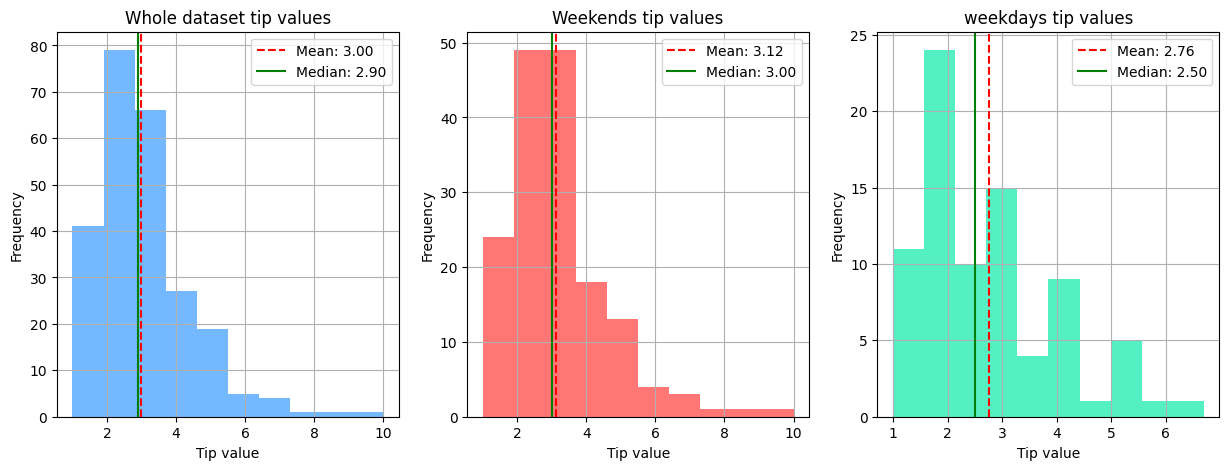

In [ ]:
# YOUR CODE
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['tip'], color='#74b9ff')
axes[0].axvline(df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {df["tip"].mean():.2f}')
axes[0].axvline(df['tip'].median(), color='green', linestyle='-', label=f'Median: {df["tip"].median():.2f}')
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

axes[1].hist(weekends_df['tip'], color='#ff7675')
axes[1].axvline(weekends_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {weekends_df["tip"].mean():.2f}')
axes[1].axvline(weekends_df['tip'].median(), color='green', linestyle='-', label=f'Median: {weekends_df["tip"].median():.2f}')
axes[1].set_title('Weekends tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

axes[2].hist(weekdays_df['tip'], color='#55efc4')
axes[2].axvline(weekdays_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {weekdays_df["tip"].mean():.2f}')
axes[2].axvline(weekdays_df['tip'].median(), color='green', linestyle='-', label=f'Median: {weekdays_df["tip"].median():.2f}')
axes[2].set_title('weekdays tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True)

##### **📝 Conclusion**

**Insights based on distribution comparison:**

**General conclusion:** The data shows that the mean, median, and the distribution of tips are all higher on weekends. This suggests that customers tend to tip more and be more generous during weekends, possibly due to a more relaxed mood or greater willingness to spend.

##### 📊 **Mann–Whitney U test**

In [ ]:

weekends_tips = weekends_df['tip']
weekdays_tips = weekdays_df['tip']

# Kiểm thử 1 phía H0: X <= Y, H1: X > Y
u_stat, p_value = mannwhitneyu(weekends_tips, weekdays_tips, alternative='greater')

print(f"U-statistic: {u_stat}")
print(f"One-sided p-value: {p_value}")

# Kiểm thử 2 phía H0: phân phối 2 nhóm như nhau H1: phân phối 2 nhóm khác nhau
u_stat, p_value_u = mannwhitneyu(weekends_tips, weekdays_tips, alternative='two-sided')
print(f"Mann-Whitney U test: p-value = {p_value_u}")


U-statistic: 7619.5
One-sided p-value: 0.02480081723430264
Mann-Whitney U test: p-value = 0.04960163446860528


###### **Conclusion after testing:**
**1. One-sided test**    

**Null hypothesis (H₀)**: Weekend tips are not higher than weekday tips (μ_weekends ≤ μ_weekdays)
**Alternative hypothesis (H₁)**: Weekend tips are higher than weekday tips (μ_weekends > μ_weekdays)

**Result**: p-value = 0.0248

👉 *With the common significance level α = 0.05, since p-value < α, we reject H₀.→ There is statistical evidence suggesting that weekend tips are higher than weekday tips.*

**2. Two-sided test**  

**Null hypothesis (H₀)**: The distributions of tips for the two groups are the same
**Alternative hypothesis (H₁)**: The distributions of tips for the two groups are different

**Result:** p-value = 0.0491

👉 Again, since p-value < 0.05, we reject H₀.
→ There is a statistically significant difference in the tip distributions between weekends and weekdays.

**Summary :**
Both tests indicate a statistically significant difference in tips between weekends and weekdays, with weekends tending to receive higher tips.
This supports the findings from the distribution plots and reinforces the conclusion that **"weekends do bring more tips."**

### **🕑 Do dinners bring more tips?**

Let's figure out the difference between dinners and lunchs in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate dinners and lunchs**

Create a new dataframe `dinner_df` containing only info about dinner.

In [ ]:
# PUT YOUR CODE HERE
dinners_df = df[df['time'] == 'Dinner']

Also create another one dataframe `Lunch_df` containing only weekdays.

In [ ]:
# PUT YOUR CODE HERE
Lunchs_df = df[~df['time'].isin(['Dinner'])]
df.time.unique()

<StringArray>
['Dinner', 'Lunch']
Length: 2, dtype: string

#### **Compare their measures of central tendency**

##### **📆 Dinners**

Do the same taking into account only dinners. Use the following variables:

* min => `dinners_tip_min`
* max => `dinners_tip_max`
* mean => `dinners_tip_mean`
* median => `dinners_tip_median`

In [ ]:
dinners_tip_min = dinners_df['tip'].min()
dinners_tip_max = dinners_df['tip'].max()
dinners_tip_mean = dinners_df['tip'].mean()
dinners_tip_median = dinners_df['tip'].median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for dinners as we did for whole dataset. Then output it.

In [ ]:
dinners_values = [dinners_tip_min, dinners_tip_max, dinners_tip_mean, dinners_tip_median]
# Round all the values to 4 decimal places
dinners_values = map(lambda x: round(x, 4), dinners_values)
# Make a dataframe from the list
dinners_mct = pd.DataFrame(dinners_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
dinners_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


##### **📆  Lunchs**

Now repeat it for lunchs. Use the following variables:

* min => `lunchs_tip_min`
* max => `lunchs_tip_max`
* mean => `lunchs_tip_mean`
* median => `lunchs_tip_median`

In [ ]:
lucnchs_tip_min = Lunchs_df['tip'].min()
lucnchs_tip_max = Lunchs_df['tip'].max()
lucnchs_tip_mean = Lunchs_df['tip'].mean()
lucnchs_tip_median = Lunchs_df['tip'].median()

Make the same dataframe containing the measures of central tendency for lunchs as we did for whole dataset. Then output it.

In [ ]:
# YOUR CODE
# Make a list of values
lunchs_values = [lucnchs_tip_min, lucnchs_tip_max, lucnchs_tip_mean, lucnchs_tip_median]
# Round all the values to 4 decimal places
lunchs_values = map(lambda x: round(x, 4), lunchs_values)

# Make a dataframe from the list
lunchs_mct = pd.DataFrame(lunchs_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
lunchs_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


##### **📝 Conclusion**

Let's show the retrieved results together:

In [ ]:
# Dict(Dictionary)
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Dinners': {'min': dinners_tip_min, 'max': dinners_tip_max, 'mean': dinners_tip_mean, 'median': dinners_tip_median},
    'Lunchs': {'min': lucnchs_tip_min, 'max': lucnchs_tip_max, 'mean': lucnchs_tip_mean, 'median': lucnchs_tip_median}
}

# Make a dataframe From Dict
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Dinners,Lunchs
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


**Insights based on measures of central tendency comparison:**

🔍 **In sight 1 : Comparison of Mean, Median**  

Both the mean and median tip amounts during dinners are higher than those during lunches

**Mean** for dinners: 3.10, compared to lunches: 2.73  
**Median** for dinners: 3.00, compared to lunches: 2.25  

→ This indicates that the tip distribution for dinners is skewed to the right, showing a tendency toward higher values.

🔍 **In sight 2: Tip value range is also greater for dinners :**

**Dinners**: min = 1.00, max = 10.00  
**Lunches**: min = 1.25, max = 6.70

→ Dinners include more high tip values, suggesting a greater potential for receiving large tips during dinner.

**General conclusion :**:
dinners do bring more tips.
Based on the mean, median, and maximum values, we can conclude that tip amounts during dinner are significantly higher than during lunch.

Next, we will visualize this with a histogram for better observation.



#### **Look at histograms**

There are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

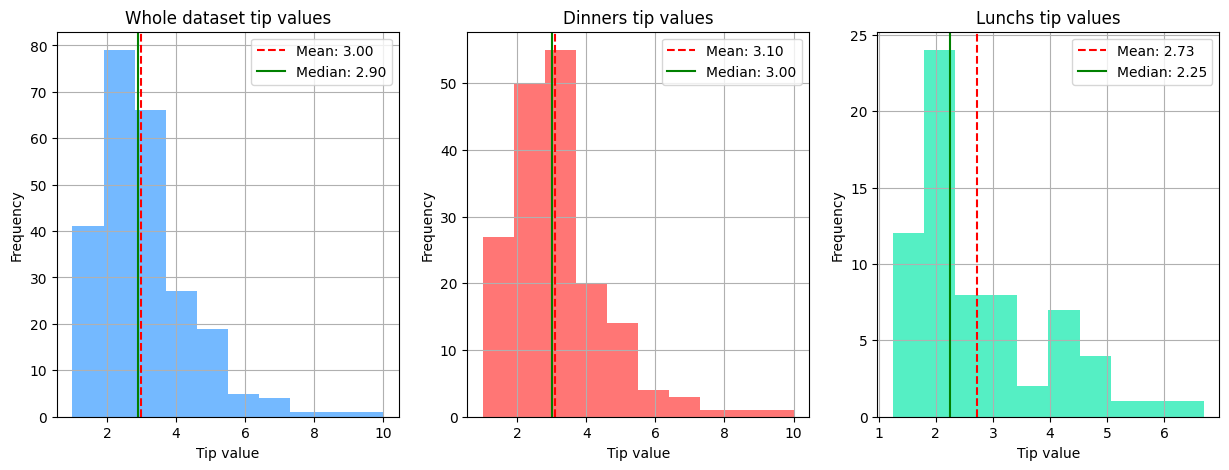

In [ ]:
# YOUR CODE
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(df['tip'], color='#74b9ff')
axes[0].axvline(df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {df["tip"].mean():.2f}')
axes[0].axvline(df['tip'].median(), color='green', linestyle='-', label=f'Median: {df["tip"].median():.2f}')
axes[0].set_title('Whole dataset tip values')
axes[0].set_xlabel('Tip value')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True)

axes[1].hist(dinners_df['tip'], color='#ff7675')
axes[1].axvline(dinners_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {dinners_df["tip"].mean():.2f}')
axes[1].axvline(dinners_df['tip'].median(), color='green', linestyle='-', label=f'Median: {dinners_df["tip"].median():.2f}')
axes[1].set_title('Dinners tip values')
axes[1].set_xlabel('Tip value')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True)

axes[2].hist(Lunchs_df['tip'], color='#55efc4')
axes[2].axvline(Lunchs_df['tip'].mean(), color='red', linestyle='--', label=f'Mean: {Lunchs_df["tip"].mean():.2f}')
axes[2].axvline(Lunchs_df['tip'].median(), color='green', linestyle='-', label=f'Median: {Lunchs_df["tip"].median():.2f}')
axes[2].set_title('Lunchs tip values')
axes[2].set_xlabel('Tip value')
axes[2].set_ylabel('Frequency')
axes[2].legend()
axes[2].grid(True)



##### **📝 Conclusion**

**Insights based on distribution comparison:**

**Insight 1: Higher Mean and Median for Dinners**  

Dinners: Mean = 3.10, Median = 3.00  
Lunches: Mean = 2.73, Median = 2.25  
→ Both the mean and median tip amounts are noticeably higher during dinner, suggesting a trend of higher tipping in the evening.

**Insight 2: Wider Distribution for Dinners**  
The distribution for dinners stretches up to $10, while lunches only go up to around $6.70
→ This indicates that dinners have a much higher chance of receiving exceptionally large tips.

**General conclusion:** In terms of mean, median, and overall distribution, dinners clearly outperform lunches. This is clearly illustrated in the histogram, which shows a distinct difference in both the level and range of tip amounts. However, statistical testing is still necessary to confirm these observations.

##### 📊 **Mann–Whitney U test**

Let's check the type of distribution and the variance of the two datasets to determine the appropriate testing method.

In [ ]:
from scipy.stats import shapiro, levene

# Dữ liệu tips
dinners_tips = dinners_df['tip']
lunchs_tips = Lunchs_df['tip']

# Kiểm tra phân phối chuẩn với Shapiro-Wilk test
shapiro_dinner_stat, shapiro_dinner_p = shapiro(dinners_tips)
shapiro_lunch_stat, shapiro_lunch_p = shapiro(lunchs_tips)

print("Shapiro-Wilk Test:")
print(f"Dinner tips: p-value = {shapiro_dinner_p:.4f}")
print(f"Lunch tips:  p-value = {shapiro_lunch_p:.4f}")

# Kiểm tra phương sai đồng nhất với Levene's test
levene_stat, levene_p = levene(dinners_tips, lunchs_tips)
print("\nLevene’s Test for Equal Variances:")
print(f"p-value = {levene_p:.4f}")


Shapiro-Wilk Test:
Dinner tips: p-value = 0.0000
Lunch tips:  p-value = 0.0000

Levene’s Test for Equal Variances:
p-value = 0.3489


Since the p-values of both datasets are less than 0.05, they do not follow a normal distribution. Therefore, we will use the **Mann–Whitney U test** for comparison.

In [ ]:
# Kiểm thử 1 phía H0: X <= Y, H1: X > Y
u_stat, p_value = mannwhitneyu(dinners_tips, lunchs_tips, alternative='greater')

print(f"U-statistic: {u_stat}")
print(f"One-sided p-value: {p_value}")

# Kiểm thử 2 phía H0: phân phối 2 nhóm như nhau H1: phân phối 2 nhóm khác nhau
u_stat, p_value_u = mannwhitneyu(dinners_tips, lunchs_tips, alternative='two-sided')
print(f"Mann-Whitney U test: p-value = {p_value_u}")

U-statistic: 7063.0
One-sided p-value: 0.014414022838396583
Mann-Whitney U test: p-value = 0.028828045676793167


###### **Conclusion after testing:**
Both tests return p-values less than 0.05, indicating a statistically significant difference in tips between the dinner and lunch groups.
And with the one-tailed (greater) test, we have statistical evidence to conclude that customers tip more at dinner compared to lunch.